In [1]:
import numpy as np

# Solving equations, plotting data

$$ x + 5 = 25 \longrightarrow \, \, x = 25 - 5 \longrightarrow \, \, x = 20 $$
$$3x = 15 \longrightarrow  x = 3^{-1} \times 15 \longrightarrow x = 5$$

$$\left(\begin{array}{cc}  3 & 2  \\  10 & -1  \\\end{array}%\right)\left(\begin{array}{c}  x   \\  y   \\\end{array}%\right)=\left(\begin{array}{c}  3   \\  5   \\\end{array}%\right)$$$$\left(\begin{array}{c}  x   \\  y   \\\end{array}%\right) = \left(\begin{array}{cc}  3 & 2  \\  10 & -1  \\\end{array}%\right)^{-1}\left(\begin{array}{c}  3   \\  5   \\\end{array}%\right).$$

In [21]:
A = np.array([[3,2],[10,-1]])

In [23]:
A

array([[ 3,  2],
       [10, -1]])

In [25]:
B = np.array([[3],[5]])

In [27]:
B

array([[3],
       [5]])

In [29]:
inv_A = np.linalg.inv(A)

In [31]:
inv_A

array([[ 0.04347826,  0.08695652],
       [ 0.43478261, -0.13043478]])

In [33]:
np.dot(inv_A,B)

array([[0.56521739],
       [0.65217391]])

In [37]:
np.linalg.solve(A,B)

array([[0.56521739],
       [0.65217391]])

In [43]:
from sympy import symbols, Eq
from sympy import plot_implicit

In [41]:
x, y = symbols('x y')

In [55]:
p1 = plot_implicit(Eq(3*x+2*y,3),(x,-2,2), (y,-2,2), line_color = 'blue', show = False)
p2 = plot_implicit(Eq(10*x - y,3),(x,-2,2), (y,-2,2), line_color = 'green', show = False)

p1.append(p2[0])

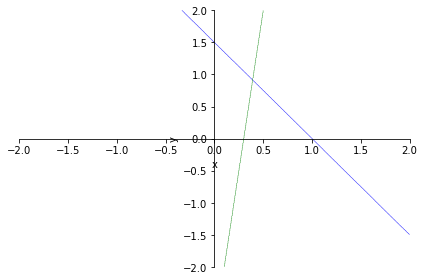

In [59]:
p1.show()

### Exercise

Consider the system of equations \begin{equation}\left\{ \begin{array}{ll}3 x + 2 y - 4 z = 2\\3 x + 2 y - (4+R) z = \frac{1}{2}\\3 x + (2+S) y - 4 z = 3\end{array}\right.\end{equation}First find the unique solution  for this system when $R=0.05$ and $S=-0.05$. Next explore if $R$ and $S$ change, how the solution behaves, and how far the new solution would be from initial solution.

In [68]:
def sys(r,s):
    A = np.array([[3,2,-4],[3,2,(-4+r)],[3,(2+s), -4]])
    B = np.array([[2], [1/2], [3]])
    return np.linalg.solve(A,B)

In [73]:
sys(0.01,-0.1)

array([[-192.66666667],
       [ -10.        ],
       [-150.        ]])

In [75]:
sys(0.05,-0.05)

array([[-26.],
       [-20.],
       [-30.]])

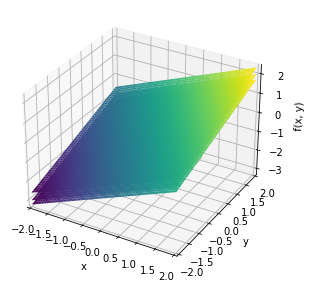

In [77]:
from sympy.plotting import plot3d
from sympy import symbols

def p1(x, y):
    return (3 * x + 2 * y - 2) / 4

def p2(x, y, r):
    return (3 * x + 2 * y - 1/2) / (4 + r)

def p3(x, y, s):
    return (3 * x + (2 + s) * y - 3) / 4

x, y = symbols('x y')

plot3d(p1(x, y), p2(x, y, 0.05), p3(x, y, -0.05), (x, -2, 2), (y, -2, 2));

In [82]:
def A(n):
    mat= np.empty([n,n])
    for i in range(n):
        for j in range(n):
            if i == j:
                mat[i,j] = 1
            else:
                mat[i,j] = i**2 + j**2
    return mat

In [84]:
A(3)

array([[1., 1., 4.],
       [1., 1., 5.],
       [4., 5., 1.]])

In [86]:
A(5)

array([[ 1.,  1.,  4.,  9., 16.],
       [ 1.,  1.,  5., 10., 17.],
       [ 4.,  5.,  1., 13., 20.],
       [ 9., 10., 13.,  1., 25.],
       [16., 17., 20., 25.,  1.]])

In [88]:
[round(np.linalg.det(A(n))) for n in range(1,11)]

[1,
 0,
 -1,
 49,
 -4429,
 518308,
 -73953607,
 12739205577,
 -2628679131155,
 643704601453309]

### Universal functions in Python

$$f(n) = n^2 + 1$$

$x = (x_1, x_2, \dots ,x_n)$ is a numpy array

$$f(x) = \Big( f_{x_1}, f_{x_2}, \dots, f_{x_n} \Big)$$

what is $$sin(x)/x$$

$$\big(sin(x_1), sin(x_2), \dots, sin(x_n)\big)/(x_1, x_2, \dots, x_n)$$

$$\big(sin(x_1)/(x_1), sin(x_2)/(x_2), \dots, sinx(_n)/(x_n)\big)$$

In [110]:
x = np.linspace(0, 2*np.pi, 20) 

In [112]:
x

array([0.        , 0.33069396, 0.66138793, 0.99208189, 1.32277585,
       1.65346982, 1.98416378, 2.31485774, 2.64555171, 2.97624567,
       3.30693964, 3.6376336 , 3.96832756, 4.29902153, 4.62971549,
       4.96040945, 5.29110342, 5.62179738, 5.95249134, 6.28318531])

In [115]:
(1 + np.sin(x) - np.cos(x)) / (1 + np.sin(x) + np.cos(x)) - np.tan(x/2)

array([ 0.00000000e+00,  0.00000000e+00,  5.55111512e-17, -1.11022302e-16,
        0.00000000e+00,  0.00000000e+00,  2.22044605e-16, -4.44089210e-16,
        0.00000000e+00,  1.77635684e-15, -1.77635684e-15, -8.88178420e-16,
       -4.44089210e-16,  2.22044605e-16,  6.66133815e-16,  1.11022302e-16,
        0.00000000e+00,  5.55111512e-17,  0.00000000e+00,  1.14423775e-17])

In [117]:
# Graphics in Python using Matplotlib

In [121]:
import matplotlib.pyplot as plt

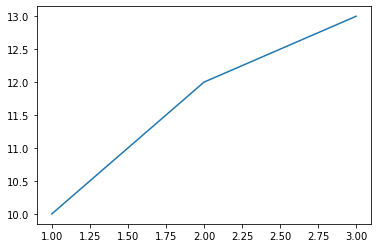

In [123]:
plt.plot([1,2,3], [10, 12, 13])

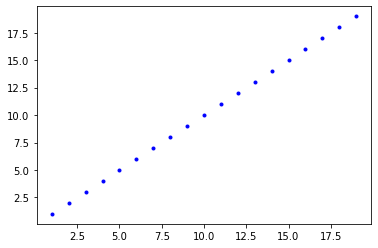

In [129]:
plt.plot(range(1,20), range(1,20), 'b.');

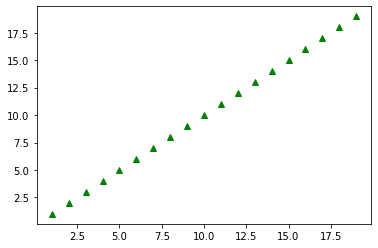

In [132]:
plt.plot(range(1,20), range(1,20), 'g^');

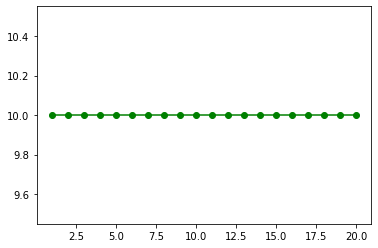

In [140]:
plt.plot(range(1,21), [10 for i in range(1,21)], color='green', marker = "o")

In [142]:
x = range(-10, 10)
y = [np.sin(i) for i in x]

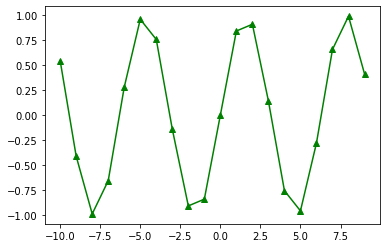

In [148]:
plt.plot( x, y, 'g^-' ); 

Plot the graph of the equation $$\sin(x)/x$$ where $-10 < x < 10$

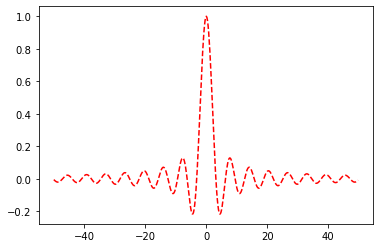

In [162]:
x = np.arange(-50, 50, 0.2)
plt.plot( x, np.sin(x)/x, 'r--' ); 

Plot the graph of $$\sin(x)/\cos(x)$$, where $0 \leq x \leq 2pi$

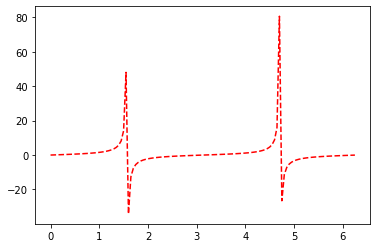

In [205]:
x = np.arange(0, 2* np.pi, 0.05)
y = np.sin(x)/np.cos(x)
plt.plot( x, y, 'r--' ); 

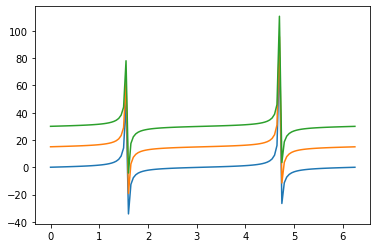

In [209]:
plt.plot(x,y, x,y+15, x,y+30);

### Exercise
consider the equation $$f_n(x) = \frac{\sin(x)-\cos(n x)}{1+x} $$

plot this equation between $0$ and $7pi$ when n changes between 1and 10

In [227]:
def f(n):
    return (np.sin(x) - np.cos(x))/(1+x)

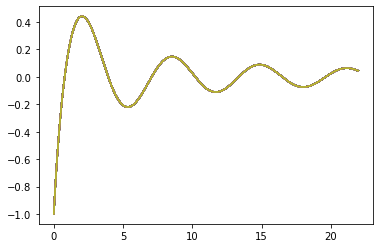

In [238]:
x = np.arange(0, 7* np.pi, 0.02)

for n in range(1,100):
    plt.plot( x, f(n));

### Parametric plots

if x and y both are functions depending on some variable t, then we call this a parametric equation

In [242]:
t = np.linspace(-np.pi, np.pi, 400)

In [258]:
x = np.sin(t)
y= np.cos(t)

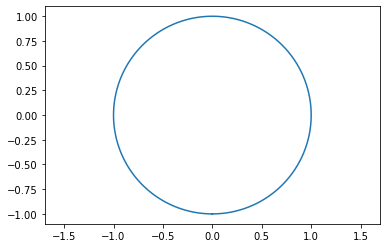

In [260]:
plt.axis('equal')
plt.plot(x, y)

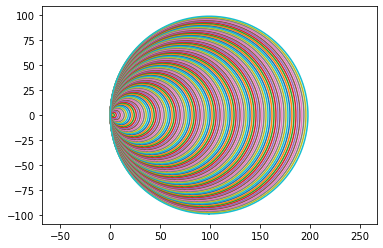

In [254]:
plt.axis('equal')
for i in range(100):
    plt.plot(x*i+i, y*i)

Plot the butterfly curve given by

$$x(t)= \sin(t)\Big( e^{\cos(t)} - 2 \cos(4t)**2-\sin^5(t/12) \Big)$$ 

$$y(t)= \cos(t)\Big( e^{\cos(t)} - 2 \cos(4t)-\sin^5(t/12) \Big)$$

In [281]:
x = np.sin(t) * (np.exp(np.cos(t)) - 2* (np.cos(4*t)**2) - (np.sin(t/12))**5)
y= np.cos(t) * (np.exp(np.cos(t)) - 2* (np.cos(4*t)) - (np.sin(t/12))**5)

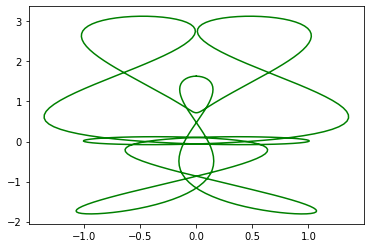

In [285]:
plt.plot(x,y, 'g')

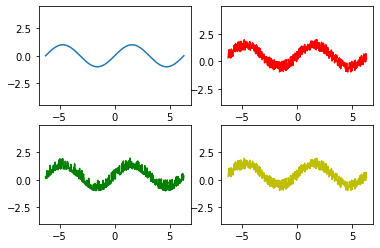

In [299]:
import random

ran = [random.random() for i in range(500)]
ran1 = [random.random()**2 for i in range(500)]

x=np.linspace(-2*np.pi, 2*np.pi, 500)

fig, axs = plt.subplots(2,2)

axs[0,0].axis('equal')
axs[0,1].axis('equal')
axs[1,0].axis('equal')
axs[1,1].axis('equal')

axs[0,0].plot(x, np.sin(x))
axs[0,1].plot(x, np.sin(x)+ran, 'r')
axs[1,0].plot(x, np.sin(x)+ran1, 'g')
axs[1,1].plot(x, np.sin(x)+ran, 'y')

In [307]:
def B(n):
    mat = np.empty([n,n])
    for i in range(n):
        i += 1; j += 1
        if (i > j):
            e = 1/(i**2 - j)
        elif (j > i):
            e = 1/(j - i)
        else:
            e = 0
        i -= 1; j -= 1
        mat [i, j] = e
    return mat

UnboundLocalError: local variable 'j' referenced before assignment